### Overview
Analyze the interdependcies between classes as output from Roaster data. 

This notebook is authored by Paul Bastide. 
No warranty.  Provided as-is. 

### Documentation
https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
https://networkx.github.io/documentation/latest/auto_examples/drawing/plot_unix_email.html 

In [1]:
!pip install plotly networkx

     |████████████████████████████████| 7.1MB 6.2MB/s eta 0:00:01     |██████████▊                     | 2.4MB 636kB/s eta 0:00:08
     |████████████████████████████████| 1.8MB 5.1MB/s eta 0:00:01
  Running setup.py install for retrying ... done
  Running setup.py install for networkx ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import networkx as nx

In [3]:
df = pd.read_csv('diagram.csv', header = None) 

In [4]:
df.head()

,0,1
0,org.bastide.Runtime,"Helper,org.bastide.WebApplication"
1,Helper,"Search1,Search2"
2,org.bastide.WebApplication,"WebException,Validator,Search1,Search2"
3,org.bastide.WebException,"Search1,Search2,Validator,Validator"


In [5]:
G = nx.MultiDiGraph()

In [6]:
for input0, output0, in zip(df[0],df[1]):
    output0 = "" + str(output0)
    if output0:
        outputs = output0.split(',')
        for output in outputs: 
            G.add_edge(input0,output, message=input0)

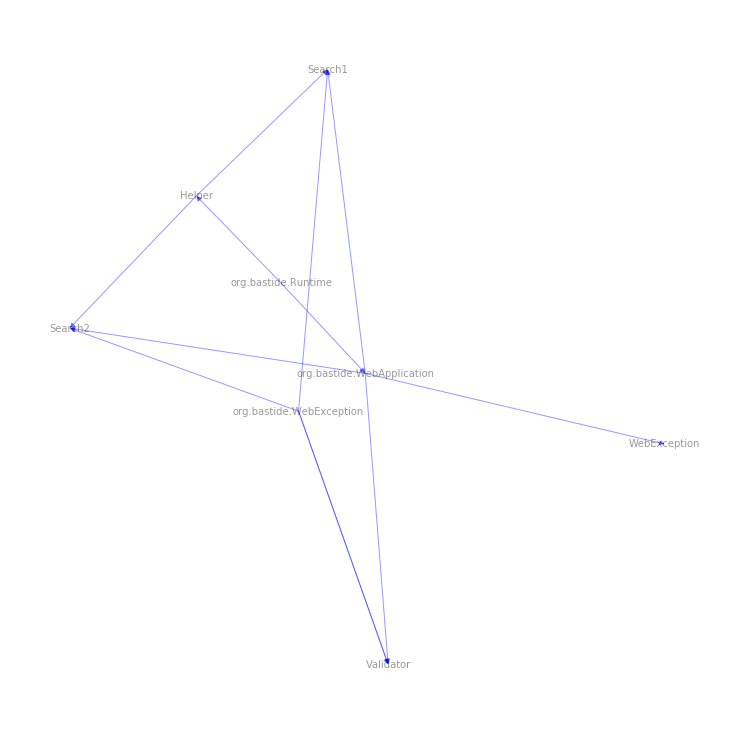

In [8]:
plt.figure(3,figsize=(10,10)) 
pos = nx.spring_layout(G, iterations=50)

nx.draw(G, pos, node_size=0, alpha=0.4, edge_color='b', font_size=10, with_labels=True)

plt.draw()
plt.savefig("diagram-network.png")